In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm
%matplotlib inline

import os
from dateutil import parser


In [2]:
chunk_hour1 = 36000 #1 hour chunk of data
time_10to11_fri = 27*chunk_hour1 #27 hours later is 10am 11am friday


    

In [3]:
## ONLY RUN IF DATA IS NOT CLEAN 
# with open('urinal-data-28-nov.csv','r') as raw, open('urinal-data-28-nov_clean.csv', 'a') as clean_f:
#     for line in raw:
#         if(len(line.split(',')) != 65):
#             print(len(line))
#         else:
#             clean_f.write(line)

In [4]:
## ONLY RUN IF DATA IS NOT CLEAN 
# from dateutil import parser
# from __future__ import print_function

# with open('urinal-data-28-nov_clean.csv', 'r') as clean_f:
#     for line in clean_f:
        
#         xl = line.split(',')
#         #if(xl[0][2] == 'T'):
#         print(xl[0][2])
        ##else:
         #   print('.', end='')
        #dt = parser.parse(xl[0])
    
            #print(xl)
           
        
# TThu Nov 23 18:00:06 2017   
#         if(len(line.split(',')) != 65):
#             print(len(line))
#         else:
#             clean_f.write(line)



In [ ]:
pickle_name = "urinal-data-28-nov_clean.p"

#----------time convert function: assumes times are ok and ignores otherwise----------   
def convert_time(t):
    try:
        dt = parser.parse(t)
    except:
        pass
        
#---------- read in pick or read csv, cleanup, and create pickle----------   
if os.path.isfile(pickle_name):
    df = pd.read_pickle(pickle_name)
else:
    df = pd.read_csv("urinal-data-28-nov_clean.csv")
    print('done reading CSV')
    df.columns= ["time"]+["P"+str(x) for x in range(64)]
    df.set_index('time')
    df["time"][461491] = 'Thu Nov 23 18:00:06 2017'
    df["time"][2750993] = 'Sun Nov 26 18:00:10 2017'
    #convert to pandas time
    print('done reading CSV')
    df["time"].apply(convert_time)
    print("done Pickling")
    df.to_pickle(pickle_name)
    print("done Pickling")
    
#tqdm.pandas(tqdm())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
df = pd.read_csv("urinal-data-28-nov_clean.csv")
df.columns= ["time"]+["P"+str(x) for x in range(64)]
df.set_index('time')


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
time,,,,,,,,,,,,,,,,,,,,,
Tue Nov 21 05:38:42 2017,23.50,24.75,26.00,24.25,23.25,23.50,22.00,24.00,25.00,26.75,...,21.50,23.25,22.50,22.00,23.00,22.50,22.25,22.75,22.00,23.50
Tue Nov 21 05:38:42 2017,24.25,24.75,24.75,23.75,24.75,23.75,23.00,23.00,26.25,26.25,...,22.25,22.75,22.50,22.00,22.75,23.50,22.25,23.50,22.00,21.75
Tue Nov 21 05:38:42 2017,25.50,26.25,24.00,23.50,23.50,24.25,23.25,21.50,26.50,25.75,...,22.25,23.00,22.25,23.25,23.00,23.75,23.00,23.25,23.25,24.25
Tue Nov 21 05:38:42 2017,24.50,26.00,24.00,23.75,23.75,23.50,22.25,22.75,25.50,25.50,...,22.75,22.75,23.00,22.50,24.00,23.00,22.75,22.50,21.50,22.00
Tue Nov 21 05:38:42 2017,24.25,26.25,22.75,23.50,23.50,24.25,22.50,22.25,26.50,25.00,...,22.50,23.50,23.00,23.00,22.00,24.00,22.25,23.50,22.00,23.75
Tue Nov 21 05:38:42 2017,24.50,25.00,23.25,23.25,23.75,23.50,22.50,22.75,25.75,23.25,...,21.50,22.75,22.25,22.75,23.25,22.50,22.25,22.00,23.00,22.50
Tue Nov 21 05:38:42 2017,26.25,24.75,23.50,24.25,24.00,24.50,23.00,22.00,25.50,24.00,...,21.50,22.75,22.25,21.50,22.50,23.50,21.50,22.25,22.50,22.25
Tue Nov 21 05:38:42 2017,24.50,24.25,23.75,23.25,24.50,24.25,23.50,22.00,24.50,24.75,...,22.75,24.25,24.25,22.75,22.50,23.50,22.50,22.25,22.00,21.50
Tue Nov 21 05:38:42 2017,25.25,24.25,22.25,23.25,23.75,23.75,22.00,22.25,23.75,23.50,...,22.25,22.25,23.50,23.00,23.25,22.75,22.50,22.75,22.50,22.50


In [32]:
#df["time"][461491] = 'Thu Nov 23 18:00:06 2017'
#df.["time"][2750993] = 'Sun Nov 26 18:00:10 2017'

# ORIGINAL RAW TIME STAMPS @ indexes above
# TThu Nov 23 18:00:06 2017"
# Sun Nov 26 18:00:Sun Nov 26 18:00:10 2017"

In [33]:
# from dateutil import parser
# def convert_time(t):
#     try:
#         dt = parser.parse(t)
#     except:
#         print(t)
    
# df["time"].apply(convert_time)

In [5]:
import timeit
start_time = timeit.default_timer()
sum1 = []
mean1 = []
median1 = []
norm = 3652340
for i in tnrange(1,65):
    sum1.append(df.iloc[:,i].sum())
    mean1.append(df.iloc[:,i].mean())
    median1.append(df.iloc[:,i].median())
    
elapsed = timeit.default_timer() - start_time
print(elapsed) 


16.6058340073


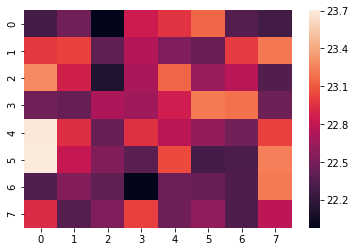

In [6]:
norm = len(df.iloc[:,2])

sum1_norm = [sum1[i]/norm for i in range(len(sum1))]
sum1_norm1 = [sum1[i]/1000000 for i in range(len(sum1))]

sum_df = pd.DataFrame({'col':sum1_norm})
sum_df = sum_df.values.reshape(8,8).astype('float')
sns.heatmap(sum_df)#, vmin=22, vmax=27)

In [7]:
centred = []
df_mean = pd.DataFrame()
for i in tnrange(1,65):
    centred = df.iloc[:,i] - mean1[i-1]
    df_mean = df_mean.append(pd.Series(centred),ignore_index=True)


# i = 1
# centred = df.iloc[:,i] - mean1[i-1]
# print(centred)

In [8]:
df_mean = df_mean.T

In [9]:
df_mean

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.207543,2.277636,4.021988,1.406099,0.282712,0.355911,-0.366314,1.71566,2.007479,3.727404,...,-0.831686,0.028815,-0.427811,-0.365151,0.469363,-0.517959,-0.215613,0.143304,-0.332883,0.72127
1,1.957543,2.277636,2.771988,0.906099,1.782712,0.605911,0.633686,0.71566,3.257479,3.227404,...,-0.081686,-0.471185,-0.427811,-0.365151,0.219363,0.482041,-0.215613,0.893304,-0.332883,-1.02873
2,3.207543,3.777636,2.021988,0.656099,0.532712,1.105911,0.883686,-0.78434,3.507479,2.727404,...,-0.081686,-0.221185,-0.677811,0.884849,0.469363,0.732041,0.534387,0.643304,0.917117,1.47127
3,2.207543,3.527636,2.021988,0.906099,0.782712,0.355911,-0.116314,0.46566,2.507479,2.477404,...,0.418314,-0.471185,0.072189,0.134849,1.469363,-0.017959,0.284387,-0.106696,-0.832883,-0.77873
4,1.957543,3.777636,0.771988,0.656099,0.532712,1.105911,0.133686,-0.03434,3.507479,1.977404,...,0.168314,0.278815,0.072189,0.634849,-0.530637,0.982041,-0.215613,0.893304,-0.332883,0.97127
5,2.207543,2.527636,1.271988,0.406099,0.782712,0.355911,0.133686,0.46566,2.757479,0.227404,...,-0.831686,-0.471185,-0.677811,0.384849,0.719363,-0.517959,-0.215613,-0.606696,0.667117,-0.27873
6,3.957543,2.277636,1.521988,1.406099,1.032712,1.355911,0.633686,-0.28434,2.507479,0.977404,...,-0.831686,-0.471185,-0.677811,-0.865151,-0.030637,0.482041,-0.965613,-0.356696,0.167117,-0.52873
7,2.207543,1.777636,1.771988,0.406099,1.532712,1.105911,1.133686,-0.28434,1.507479,1.727404,...,0.418314,1.028815,1.322189,0.384849,-0.030637,0.482041,0.034387,-0.356696,-0.332883,-1.27873
8,2.957543,1.777636,0.271988,0.406099,0.782712,0.605911,-0.366314,-0.03434,0.757479,0.477404,...,-0.081686,-0.971185,0.572189,0.634849,0.719363,-0.267959,0.034387,0.143304,0.167117,-0.27873
9,2.957543,1.277636,2.021988,0.906099,1.032712,0.605911,0.883686,0.71566,1.507479,0.227404,...,-0.081686,-0.221185,-1.177811,-1.365151,-0.280637,0.232041,0.284387,-1.106696,0.167117,-0.52873


In [27]:
cMean = []
for i in tnrange(64):
    cMean.append(df_mean.iloc[:,i].mean())
    
# for i in tnrange(1,65):
#     sum1.append(df.iloc[:,i].sum())
#     mean1.append(df.iloc[:,i].mean())
# df_mean.iloc[:,10].mean()

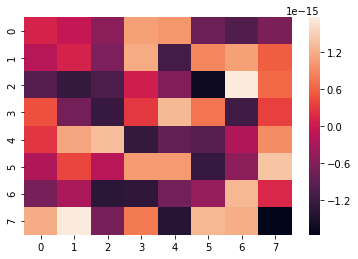

In [29]:
cMean_df = pd.DataFrame({'col':cMean})
cMean_df = cMean_df.values.reshape(8,8).astype('float')
sns.heatmap(cMean_df)#, vmin=22, vmax=27)

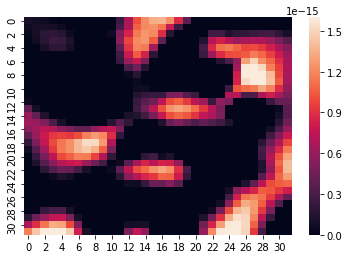

In [39]:
from scipy.interpolate import griddata
import math


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = cMean
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=0, vmax=1.6e-15)

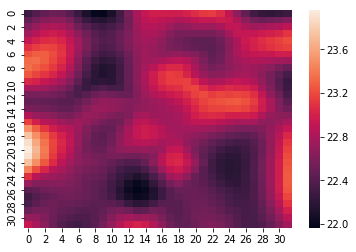

In [101]:


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = mean1
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [107]:
# pd.rolling_window(pd.DataFrame(sample[3:, 1:3]), window=3).count()
frames = []
# for row in df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:].iterrows():
#     frames.append(np.array(row[1:]).reshape(8,8).astype('float'))
#     print(pd.Series(row[1:]).values.reshape(8,8))
df_chunk = df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:]
# df_chunk.iloc[:,0]
for i in range(64):
    frames.append(df_chunk.iloc[:,i].mean())

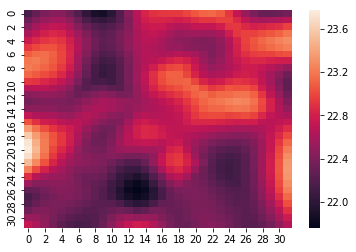

In [108]:
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = frames
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [168]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.core.display import HTML
%matplotlib inline
import timeit

In [ ]:
fig = plt.figure()
data = frames[0]
# sns.heatmap(data, linewidths=0.5, annot=True)
def init():
    h_init = sns.heatmap(np.zeros((8, 8)), linewidths=0.5, annot=True, vmin=22, vmax=27)
    type(h_init)
    return [h_init]
def animate(i):
    plt.clf()
    data = frames[i]
    h_curr = sns.heatmap(data, linewidths=0.5, annot=True, vmin=22, vmax=27)
    return h_curr
#init()
animate(599)

In [ ]:
start_time = timeit.default_timer()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600, interval=60, repeat=True,blit=True)
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [ ]:
start_time = timeit.default_timer()
anim.save('mymovie.mp4',fps=10)
elapsed = timeit.default_timer() - start_time
print(elapsed)
plt.close(fig)

In [ ]:
start_time = timeit.default_timer()
HTML(anim.to_html5_video())
elapsed = timeit.default_timer() - start_time
print(elapsed)